<a href="https://colab.research.google.com/github/murali-marimekala/tensorflow_deeplearning_bootcamp/blob/main/5_Computer_Vision_and_Convolution_Neural_Networks_In_Tensorflow/1_Computer_Vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolution neural network (CNN) - TinyVGG Architecture (note there are many ways you can stack layers in CNN).
* We might see tf.keras.layers.Sequential, Conv2D (two dimensional data), MaxPool2D
* Input layer <== Images (batch size, image height, image width, color_channels)
* Convolution layer ConvXD <== Same parameters as above without input shape. Extracts and learns from the images (X can be 1, 2, 3)
* Hidden activation : Non linear activation function (ReLU). Adds non linearity to the features.
* MaxPoold2D : Reduces the dimensionality of learned image features.
* Fully Connected layer: Further refines learned features from convolution layers.
*Output activation : Adds non liniearity to the output layer.

In [16]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00


In [1]:
# Computer vision is a practice of writing algorithms which can discover patters in visual data. Such as camera, self driving car recognizing the car in front.

**Get Data**

# The images we are working are from https://www.kaggle.com/datasets/dansbecker/food-101?resource=download
# However we modified it to use two classes pizza and steak https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip (Derived from https://github.com/murali-marimekala/tensorflow-deep-learning)


In [18]:

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-04-10 08:16:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.207, 172.217.214.207, 142.251.189.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   278MB/s    in 0.4s    

2025-04-10 08:16:16 (278 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine leanring project i s becoming one with the data.

And for a computer vision project this usually means visualizing many spamples of your data

In [19]:
!ls pizza_steak/train


pizza  steak


In [20]:
!ls pizza_steak/train/*

pizza_steak/train/pizza:
1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jp

In [21]:
import os

#Walk through pizzasteak directory and list the number of files
for dirpath, dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} and images in '{dirpath}'.")

There are 2 directories and 0 and images in 'pizza_steak'.
There are 2 directories and 0 and images in 'pizza_steak/train'.
There are 0 directories and 750 and images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 and images in 'pizza_steak/train/steak'.
There are 2 directories and 0 and images in 'pizza_steak/test'.
There are 0 directories and 250 and images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 and images in 'pizza_steak/test/steak'.


In [22]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 10 08:14 .
drwxr-xr-x 1 root root 4096 Apr 10 08:16 ..
drwxr-xr-x 4 root root 4096 Apr 10 08:14 test
drwxr-xr-x 4 root root 4096 Apr 10 08:14 train


In [23]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To Visualize our images, first get the class names programatically

In [24]:
#Get the class name programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob('*'))) #Create the list of class names from the sub directory
print(class_names)

['pizza' 'steak']


In [25]:
#Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Set the target directory (we will view images from here)
  target_folder = target_dir + target_class

  #Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it matplot lib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #Show the shape of the image

  return img


['2238802.jpg']
Image shape: (512, 512, 3)


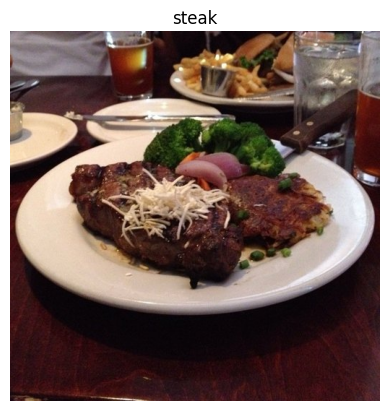

In [26]:
# View a random image from training data set
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

## An  end-to-end example

Lets build a CNN to find patterns in our images. Most specifically , we need a way to
* load our images
* preprocess our image,
* Build CNN to find patterns in our images
* Compile and Fit CNN

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Pre process data (called scaling / normalization. values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               seed=42)
# Buid a CNN model (Same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(244,244,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5533 - loss: 0.6823 - val_accuracy: 0.6740 - val_loss: 0.5967
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7426 - loss: 0.5282 - val_accuracy: 0.8440 - val_loss: 0.3826
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8225 - loss: 0.4157 - val_accuracy: 0.8820 - val_loss: 0.3296
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8434 - loss: 0.3678 - val_accuracy: 0.8380 - val_loss: 0.3823
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8468 - loss: 0.3646 - val_accuracy: 0.8600 - val_loss: 0.3275


In [29]:
len(train_data)

47

* CPU took 136 seconds with CPU.
47/47 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.5894 - loss: 0.6817 - val_accuracy: 0.7500 - val_loss: 0.4734

*Enabled runtime GPU acceleration in colab. It took around 17 seconds
47/47 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.5894 - loss: 0.6817 - val_accuracy: 0.7500 - val_loss: 0.4734



In [30]:
# Get model 1 summar

In [32]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 242, 242, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 240, 240, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 120, 120, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 118, 118, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 116, 116, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 58, 58, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 33640)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          33,641 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,955 (429.52 KB)

 Trainable params: 36,651 (143.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 73,304 (286.35 KB)

🌪 Check https://poloclub.github.io/cnn-explainer/

# Use same model as before

Lets replicate the model we have built in a preivouis section to see if it works with our image data. Model we are building is from the [Tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=4,2&seed=0.70420&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


In [33]:
# Use the same model as before


#Set random seed
tf.random.set_seed(42)

#Create a model to repliace the tensorflow playground model.
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(244,244,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.5151 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.4753 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.4984 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.5029 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.5045 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [34]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 178608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │         714,436 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,143,385 (8.18 MB)

 Trainable params: 714,461 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,428,924 (5.45 MB)

In [37]:
#Despite having 20x more parameters than our CNN(model_1), model_2 perform terribly lets improve it.

#Set random seed
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(244, 244, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 732ms/step - accuracy: 0.5859 - loss: 7.4291 - val_accuracy: 0.6640 - val_loss: 1.1720
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 704ms/step - accuracy: 0.6749 - loss: 1.0251 - val_accuracy: 0.6460 - val_loss: 0.7610
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 709ms/step - accuracy: 0.6747 - loss: 0.9225 - val_accuracy: 0.7620 - val_loss: 0.5275
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 696ms/step - accuracy: 0.7299 - loss: 0.6180 - val_accuracy: 0.5600 - val_loss: 1.2400
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 696ms/step - accuracy: 0.6981 - loss: 0.7773 - val_accuracy: 0.7520 - val_loss: 0.6290


In [38]:
#Get summary of model_3
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 178608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │      17,860,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,643,605 (204.63 MB)

 Trainable params: 17,881,201 (68.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,762,404 (136.42 MB)